--- Loading and Exploring Dataset ---
Dataset loaded successfully.

Dataset Shape: (113036, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113

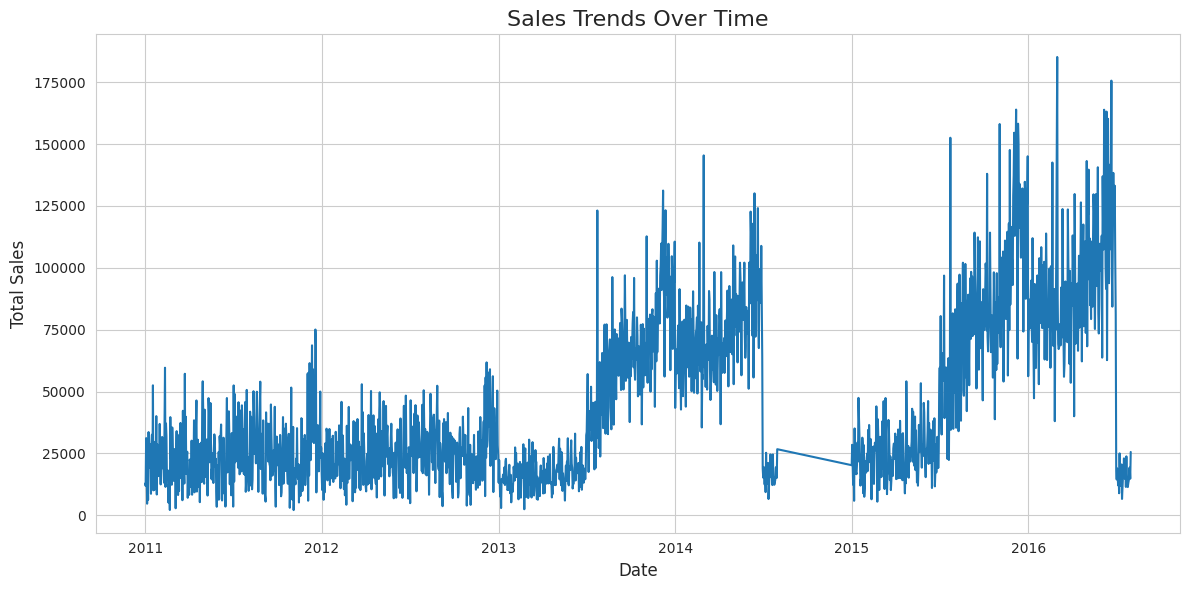

Note: The 'Discount' column was not found in the dataset.
A scatter plot for 'Profit' will not be generated against 'Discount' as 'Discount' is missing.


<ipython-input-2-c0cf1f9c6294>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_country, x='Country', y='Sales', palette='viridis')


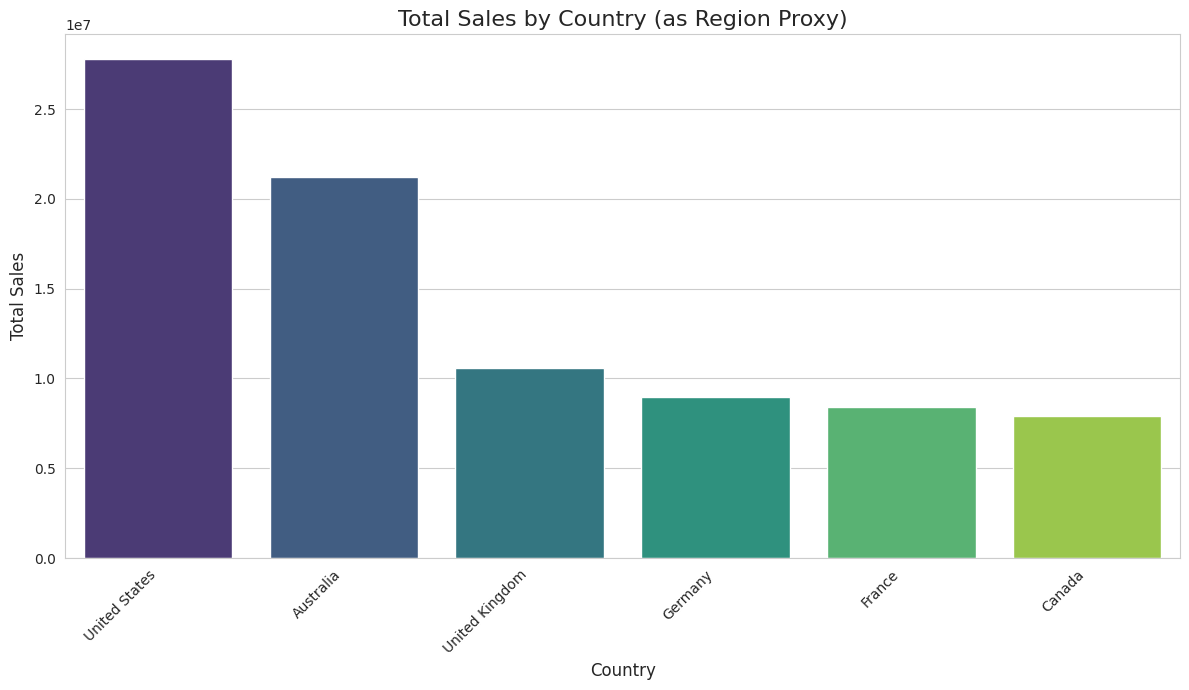

<ipython-input-2-c0cf1f9c6294>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_product_category, x='Product_Category', y='Sales', palette='magma')


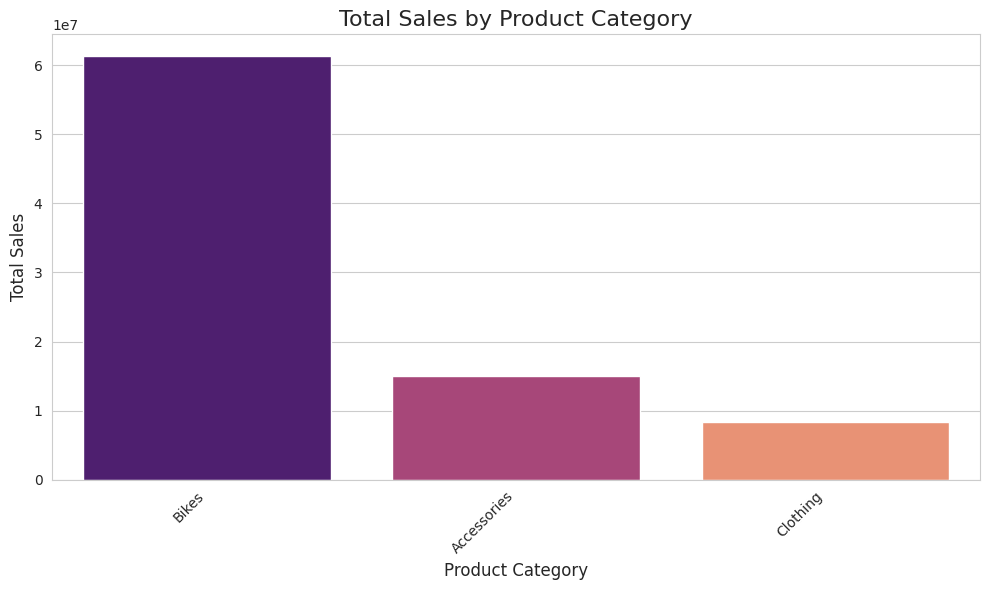


--- Predictive Modeling: Linear Regression ---
Training data shape: (89628, 1)
Testing data shape: (22408, 1)

Model Training Complete.

--- Model Performance Metrics ---
R-squared (R²) Score: 0.9123
Mean Squared Error (MSE): 151425.64
Root Mean Squared Error (RMSE): 389.13

--- Model Coefficients ---
Intercept: -30.56
Coefficient for Profit: 2.75

--- Insights and Recommendations ---
Based on the analysis of the sales data, here are some insights and recommendations:

1. Sales Trends Over Time:
   - Observe the 'Sales Trends Over Time' plot. If there are clear peaks or troughs, it indicates seasonality or specific periods of high/low sales.
   - Analyze the overall trend: Is there consistent growth, decline, or stagnation? This can inform long-term strategy.

2. Profit vs. Discount Relationship:
   - The 'Discount' column was not found in the dataset, so a direct relationship between Profit and Discount could not be analyzed.
   - If future data includes discounting information, a sc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Dataset Selection & Loading ---
# Dataset Name: sales_data.csv
file_path = 'sales_data.csv' # Assuming the file is in the same directory or accessible by this path

print("--- Loading and Exploring Dataset ---")
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    exit() # Exit if the file isn't found

# Display basic information about the dataset
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


# --- 2. Data Cleaning ---
print("\n--- Data Cleaning ---")

# Remove duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_duplicates = df.shape[0]
print(f"Removed {initial_rows - rows_after_duplicates} duplicate rows.")

# Based on previous output, there are no missing values.
# The fillna operations are removed to streamline the code.
print("No missing values detected in the dataset. Skipping imputation steps.")

# Convert 'Date' column to datetime object
if 'Date' in df.columns:
    # Explicitly specify the format to avoid UserWarning
    # Assuming '01-03-2014' format is Day-Month-Year
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
    # Drop rows where 'Date' conversion failed (resulted in NaT)
    if df['Date'].isnull().any():
        initial_date_rows = df.shape[0]
        df.dropna(subset=['Date'], inplace=True)
        print(f"Removed {initial_date_rows - df.shape[0]} rows due to invalid 'Date' values.")
    print("Converted 'Date' column to datetime objects.")
else:
    print("Warning: 'Date' column not found in the dataset. Time series analysis might be limited.")


print("\nMissing Values After Cleaning (should be all zeros):")
print(df.isnull().sum())
print("\nDataset Info After Cleaning:")
df.info()


# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Set aesthetic style for plots
sns.set_style("whitegrid")
# Removed: plt.rcParams['font.family'] = 'Inter' as 'Inter' font was not found. Using default.

# 3.1. Sales trends over time (time series plot)
if 'Date' in df.columns and 'Sales' in df.columns:
    # Aggregate sales by date
    daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
    # Sort by date to ensure correct time series plotting
    daily_sales = daily_sales.sort_values('Date')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=daily_sales, x='Date', y='Sales')
    plt.title('Sales Trends Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Sales trends over time as 'Date' or 'Sales' column is missing or invalid.")


# 3.2. Relationship between Profit and Discount (scatter plot)
# The 'Discount' column is not present in your dataset.
print("Note: The 'Discount' column was not found in the dataset.")
if 'Profit' in df.columns:
    print("A scatter plot for 'Profit' will not be generated against 'Discount' as 'Discount' is missing.")
    # If a proxy for discount (e.g., derived from Unit_Price and Unit_Cost) was available,
    # it could be used here. For now, we acknowledge its absence.
else:
    print("Cannot analyze Profit relationship as 'Profit' column is missing.")


# 3.3. Sales distribution by Region (bar plot) - Using 'Country' as a proxy for 'Region'
if 'Country' in df.columns and 'Sales' in df.columns:
    sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(12, 7))
    sns.barplot(data=sales_by_country, x='Country', y='Sales', palette='viridis')
    plt.title('Total Sales by Country (as Region Proxy)', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Sales by Country as 'Country' or 'Sales' column is missing.")


# 3.4. Sales distribution by Category (bar plot) - Using 'Product_Category' as 'Category'
if 'Product_Category' in df.columns and 'Sales' in df.columns:
    sales_by_product_category = df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_by_product_category, x='Product_Category', y='Sales', palette='magma')
    plt.title('Total Sales by Product Category', fontsize=16)
    plt.xlabel('Product Category', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Sales by Product Category as 'Product_Category' or 'Sales' column is missing.")


# --- 4. Predictive Modeling ---
print("\n--- Predictive Modeling: Linear Regression ---")

# Define features (X) and target (y)
# 'Discount' column is not available in the dataset, so we use 'Profit' as the sole feature for now.
features = ['Profit']
target = 'Sales'

# Check if required columns exist before proceeding with modeling
if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]

    # Split the data into training and testing sets
    # Using random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\nModel Training Complete.")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error

    print("\n--- Model Performance Metrics ---")
    print(f"R-squared (R²) Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Display model coefficients and intercept
    print("\n--- Model Coefficients ---")
    print(f"Intercept: {model.intercept_:.2f}")
    for i, feature in enumerate(features):
        print(f"Coefficient for {feature}: {model.coef_[i]:.2f}")

    # --- 5. Insights and Recommendations ---
    print("\n--- Insights and Recommendations ---")
    print("Based on the analysis of the sales data, here are some insights and recommendations:")

    # Insights from EDA
    if 'Date' in df.columns and 'Sales' in df.columns:
        print("\n1. Sales Trends Over Time:")
        print("   - Observe the 'Sales Trends Over Time' plot. If there are clear peaks or troughs, it indicates seasonality or specific periods of high/low sales.")
        print("   - Analyze the overall trend: Is there consistent growth, decline, or stagnation? This can inform long-term strategy.")
    else:
        print("\n1. Sales Trends: (Date or Sales column was not available for this analysis)")

    print("\n2. Profit vs. Discount Relationship:")
    print("   - The 'Discount' column was not found in the dataset, so a direct relationship between Profit and Discount could not be analyzed.")
    print("   - If future data includes discounting information, a scatter plot could reveal optimal discount rates.")

    if 'Country' in df.columns and 'Product_Category' in df.columns and 'Sales' in df.columns:
        # Ensure sales_by_country and sales_by_product_category are populated if columns exist
        sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).reset_index()
        sales_by_product_category = df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False).reset_index()

        print("\n3. Sales Performance by Country (as Region Proxy) and Product Category:")
        if not sales_by_country.empty:
            print(f"     - Top performing country (as region proxy): {sales_by_country.iloc[0]['Country']} (Total Sales: {sales_by_country.iloc[0]['Sales']:.2f})")
        if not sales_by_product_category.empty:
            print(f"     - Top performing product category: {sales_by_product_category.iloc[0]['Product_Category']} (Total Sales: {sales_by_product_category.iloc[0]['Sales']:.2f})")
        print("     - Focus marketing efforts and resource allocation on top-performing countries and product categories to maximize sales.")
        print("     - Investigate underperforming areas to understand root causes (e.g., competition, market saturation, product fit issues) and develop targeted strategies.")
    else:
        print("\n3. Sales Performance by Country/Product Category: (Relevant columns were not available for this analysis)")

    # Insights from Predictive Model
    if all(col in df.columns for col in features + [target]):
        print("\n4. Factors Affecting Sales (from Linear Regression Model):")
        print(f"   - The model was trained using 'Profit' as the sole predictive feature for 'Sales' due to the absence of a 'Discount' column.")
        print(f"   - The model suggests that for every unit increase in Profit, Sales tend to increase by {model.coef_[features.index('Profit')]:.2f} units.")
        print("   - The R² score indicates how much of the variance in Sales is explained by Profit. A higher R² is better, but a model with a single feature might have limitations.")
        print("   - The MSE/RMSE values indicate the average magnitude of the errors in predictions. Lower values are better.")

        print("\nRecommendations:")
        print("   - **Leverage Profitability:** Since Profit is a significant predictor, strategies that increase profitability (e.g., optimizing procurement, reducing operational costs) are likely to positively impact sales.")
        print("   - **Strategic Pricing:** Even without a direct 'Discount' column, you can analyze 'Unit_Price' and 'Unit_Cost' to understand pricing dynamics and their impact on sales and profit. Consider A/B testing different price points or bundled offers.")
        print("   - **Geographic and Product Focus:** Continue to prioritize high-performing countries and product categories based on sales data. Explore reasons for success in these areas and replicate strategies where applicable.")
        print("   - **Data Enrichment:** For a more comprehensive predictive model, consider adding new features if available, such as marketing spend, customer demographics, or external economic indicators. If possible, acquiring a 'Discount' column would significantly enhance the analysis of promotional impacts.")

    else:
        print("\n--- Predictive Modeling Skipped ---")
        print("Required columns ('Sales', 'Profit') for predictive modeling were not all present after cleaning, or there was insufficient data.")

